<a href="https://colab.research.google.com/github/arminsoltan/mohaymen/blob/main/Phase05/Word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embedding

In [ ]:
!pip install parsivar

     |████████████████████████████████| 36.2 MB 61 kB/s 
     |████████████████████████████████| 1.5 MB 46.1 MB/s 
  Created wheel for parsivar: filename=parsivar-0.2.3-py3-none-any.whl size=36492971 sha256=bdd128d073c9544d21941993d820a8812455e06dbfff23861a14855178f3d77d
  Stored in directory: /root/.cache/pip/wheels/ae/67/7a/49cbf08f64d3f76a26eceaf0e481a40e233f05d4356875cbed
  Created wheel for nltk: filename=nltk-3.4.5-py3-none-any.whl size=1449926 sha256=5dba27005ba7c6edb20de6b79892bba5369b453eb12c8cc781a805ed66b94345
  Stored in directory: /root/.cache/pip/wheels/48/8b/7f/473521e0c731c6566d631b281f323842bbda9bd819eb9a3ead
Successfully built parsivar nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
# !unrar x "/content/drive/MyDrive/Mohaymen/Phase05/HAM2.rar" "/content/drive/MyDrive/Mohaymen/Phase05/hamshahri"

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_pickle("/content/drive/MyDrive/Mohaymen/Phase05/data.pkl")
df.rename(columns={'new_content': 'preprocessing', 'category': 'label'}, inplace=True)
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

df.head() 

,year,label,content,title,preprocessing
2,1998,1,. سرويس ادب و هنر: اوكتاويو پاز شاعر و نويسنده...,اوكتاويو پاز درگذشت,سرویس ادب هنر اوکتاویو پاز شاعر نویسنده مشهورم...
3,1998,1,بهار سرزمين ما را شكوفه باران كرد: در امتداد ي...,تقديم به سردار سازندگي حضرت آيت الله هاشمي رفس...,بهار سرزمین شکوفه باران امتداد ناامید عشق ضریح...
7,1998,4,خانه تاريخي صالح از طرف ورثه مرحوم ميرزاحسن خا...,از سوي ورثه مرحوم ميرزاحسن خان مبصرالممالك درش...,خانه تاریخی صالح ورثه مرحوم میرزاحسن خان مبصرا...
8,1998,4,. سرويس علمي فرهنگي: جشنواره هاي فرهنگي، هنري ...,در 9 دانشگاه كشورجشنواره هاي فرهنگي و هنري دان...,سرویس علمی فرهنگی جشنواره فرهنگی هنری دانشجو س...
9,1998,4,سرويس علمي فرهنگي: نتايج نهايي آزمون سراسري دا...,رئيس سازمان سنجش آموزش نتايج نهايي كنكوركشور: ...,سرویس علمی فرهنگی نتایج نهایی آزمون سراسری دان...


In [ ]:
print(le.inverse_transform([0, 1, 2, 3, 4, 5]))

['اجتماعی' 'ادب و هنر' 'اقتصاد' 'سیاسی' 'علمی فرهنگی' 'ورزش']


In [ ]:
import torch
import torchtext
SEED = 100
torch.manual_seed(SEED)
X = df["preprocessing"]
Y = df["label"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

In [ ]:
!pip install python-bidi
!pip install arabic-reshaper

In [ ]:
from sklearn.decomposition import PCA
from bidi.algorithm import get_display
from arabic_reshaper import reshape
import matplotlib.pyplot as plt

distribution  = list(df.label.value_counts())

classes = ['سیاسی','اقتصاد','ورزش','اجتماعی','علمی فرهنگی','ادب و هنر'] 
classes = [get_display(reshape(label)) for label in classes]

In [ ]:
train_data = pd.concat([X_train, y_train], axis=1)
valid_data = pd.concat([X_valid, y_valid], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv("/content/drive/MyDrive/Mohaymen/Phase05/hamshahri/train.csv")
valid_data.to_csv("/content/drive/MyDrive/Mohaymen/Phase05/hamshahri/valid.csv")
test_data.to_csv("/content/drive/MyDrive/Mohaymen/Phase05/hamshahri/test.csv")

In [ ]:
train_data.head()

,preprocessing,label
18260,هشتمین نمایشگاه بین‌المللی عکس تهران سخن سیدعط...,1
5797,قیمت فروش سکه طلانوع قیمتریالسکه بهارآزادیطرح ...,2
9451,نماینده ماهشهر ابتکار آقا خاتمی نشات تفکر دینی...,3
14510,همزمان هفته دولت نخستین کارخانه تولید کازوئین ...,2
1806,غربزده‌ها لیبرال تلاش کرد&کن اسلام ولایت فقیه ...,3


In [ ]:
import torchtext
import torch
TEXT = torchtext.legacy.data.Field(tokenize='spacy', include_lengths=True, batch_first=True)
LABEL = torchtext.legacy.data.LabelField(dtype=torch.float, batch_first=True)
fields = [(None, None), ('preprocessing',TEXT), ('label', LABEL)]

In [ ]:
train_data = torchtext.legacy.data.TabularDataset(path="/content/drive/MyDrive/Mohaymen/Phase05/hamshahri/train.csv", format="csv", fields=fields, skip_header=True)
valid_data = torchtext.legacy.data.TabularDataset(path="/content/drive/MyDrive/Mohaymen/Phase05/hamshahri/valid.csv", format="csv", fields=fields, skip_header=True)
test_data = torchtext.legacy.data.TabularDataset(path="/content/drive/MyDrive/Mohaymen/Phase05/hamshahri/test.csv", format="csv", fields=fields, skip_header=True)

In [ ]:
TEXT.build_vocab(train_data, valid_data, min_freq=3)
LABEL.build_vocab(train_data, valid_data)

In [ ]:
print(len(TEXT.vocab))
print(len(LABEL.vocab))
print(LABEL.vocab.freqs.most_common(10))
print(TEXT.vocab.stoi)
print(LABEL.vocab)

18327
6
[('3', 1811), ('2', 1665), ('5', 1213), ('4', 942), ('0', 351), ('1', 286)]
defaultdict(<bound method Vocab._default_unk_index of <torchtext.legacy.vocab.Vocab object at 0x7f7cc4c1f610>>, {'<unk>': 0, '<pad>': 1, 'کشور': 2, 'ایران': 3, 'اسلامی': 4, 'سال': 5, 'جمهوری': 6, 'کرد&کن': 7, 'تهران': 8, 'تیم': 9, 'رئیس': 10, 'شرکت': 11, 'دولت': 12, 'افزود&افزا': 13, 'گزارش': 14, 'طرح': 15, 'شورا': 16, 'قیمت': 17, 'مجلس': 18, 'سازمان': 19, 'سیاسی': 20, 'وزیر': 21, 'اقتصادی': 22, 'آقا': 23, 'وزارت': 24, 'ملی': 25, 'قرار': 26, 'کار': 27, 'ریال': 28, 'میلیون': 29, 'شد&شو': 30, 'فرهنگی': 31, 'درصد': 32, 'آموزش': 33, 'جامعه': 34, 'قانون': 35, 'داد&ده': 36, 'آن\u200cها': 37, 'افزایش': 38, 'نفت': 39, 'نظام': 40, 'توانست&توان': 41, 'نماینده': 42, 'برنامه': 43, 'توسعه': 44, 'سرویس': 45, 'دانشگاه': 46, 'دست': 47, 'ماه': 48, 'حضور': 49, 'رابطه': 50, 'هیات': 51, 'انقلاب': 52, 'گروه': 53, 'نظر': 54, 'دیدار': 55, 'تولید': 56, 'جوان': 57, 'جهان': 58, 'هفته': 59, 'برگزار': 60, 'استان': 61, 'توجه': 62, 

In [ ]:
# vocab_size = len(TEXT.vocab)
batch_size = 8
embed_dim = 128
num_class = 6

In [ ]:
train_loader = torchtext.legacy.data.BucketIterator(train_data, batch_size, sort_key= lambda x: len(x.preprocessing),
                                  train=True, shuffle=True, sort_within_batch=True)

valid_loader = torchtext.legacy.data.BucketIterator(valid_data, batch_size, sort_key= lambda x: len(x.preprocessing),
                                  train=False, shuffle=False, sort_within_batch=True)

test_loader = torchtext.legacy.data.BucketIterator(test_data, batch_size, sort_key= lambda x: len(x.preprocessing),
                                  train=False, shuffle=False, sort_within_batch=True)

In [ ]:
def multi_class_acc(y_pred, y_act):

  y_pred_softmax = torch.softmax(y_pred, 1)
  _, y_pred_tag = torch.max(y_pred_softmax,1)

  correct = (y_pred_tag == y_act).float()
  acc = correct.sum()/len(correct)
  acc = torch.round(acc * 100)

  return acc

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class LSTM(nn.Module):
  def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, num_layers, dropout):
    super().__init__()

    self.embedding = nn.Embedding(vocab_size, embedding_dim)

    self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, dropout=dropout, batch_first=True)

    self.fc = nn.Linear(hidden_dim * 2, output_dim)

  def forward(self, text, text_length):
    embedded = self.embedding(text)

    packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_length, batch_first=True)

    packed_out, (hidden, cell) = self.lstm(packed_embedded)

    hidden = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)

    outputs = self.fc(hidden)
  
    return outputs

In [ ]:
def train_fun(model, train_loader):
  
  train_epoch_loss = 0
  train_epoch_acc = 0
  
  model.train()

  loop = tqdm(enumerate(train_loader), total = n_total_step, leave = False)

  for i, batch in loop:
    
    optimizer.zero_grad()

    text, text_length = batch.preprocessing

    text = text.to(device)
    # text_length = len(text)

    y_pred = model(text, text_length).squeeze()

    label = batch.label.to(torch.long)

    loss_train = criterion(y_pred, label)

    acc_train = multi_class_acc(y_pred, label)

    loss_train.backward()

    optimizer.step()

    train_epoch_loss += loss_train.item()
    train_epoch_acc += acc_train.item()

    loop.set_description(f'Epoch : [{epoch}/{num_epoch}]')
    loop.set_postfix(loss = loss_train.item(), accuracy = acc_train.item()) 
  
  train_loss.append(train_epoch_loss/len(train_loader))
  train_acc.append(train_epoch_acc/len(train_loader))  

  return train_loss, train_acc


def evaluate(model, valid_loader):

  with torch.no_grad():
    model.eval()

    val_epoch_loss = 0
    val_epoch_acc = 0

    for batch in valid_loader:

      text, text_length = batch.preprocessing

      text = text.to(device)

      y_pred_val = model(text, text_length).squeeze()
      label = batch.label.to(torch.long)
      loss_valid = criterion(y_pred_val, label)
      acc_valid =  multi_class_acc(y_pred_val, label) 

      val_epoch_loss += loss_valid.item()
      val_epoch_acc += acc_valid.item()

    valid_loss.append(val_epoch_loss/len(valid_loader))
    valid_acc.append(val_epoch_acc/len(valid_loader))  

  return valid_loss, valid_acc

In [ ]:
def test(model, test_loader):
  y_pred_test = []
  y_actual_test = []

  model.eval()
  with torch.no_grad():
    n_true = 0
    n_total = 0
    n_class_correct = [0 for i in range(num_class)]
    n_class_sample = [0 for i in range(num_class)]
  
    for batch in test_loader:

      text, text_length = batch.preprocessing
      
      output = model(text, text_length).squeeze()

      _, y_predtest = torch.max(output,1)

      n_true += (y_predtest == batch.label).sum()
      n_total += batch.label.size(0)

      for i in range(len(y_predtest)):
        y_pred_test.append(y_predtest[i])
        y_actual_test.append(batch.label[i].item())

      for i in range(len(y_predtest)):
        lb = int(batch.label[i].item())
        pred = y_predtest[i]
        if pred == lb:
          n_class_correct[lb] += 1
        n_class_sample[lb] += 1   

    print(f'accuracy of network on the {len(test_loader)} texts is : {(n_true/n_total) *100}')
  
    for i in range(len(classes)):
      acc = 100.0 * n_class_correct[i] / n_class_sample[i]
      print(f'Accuracy of {classes[i]}: {acc} %')
  
  return y_pred_test, y_actual_test

In [ ]:
# len(TEXT.vocab)
print(TEXT.vocab.stoi)
print(len(TEXT.vocab))

defaultdict(<bound method Vocab._default_unk_index of <torchtext.legacy.vocab.Vocab object at 0x7f7cc4c1f610>>, {'<unk>': 0, '<pad>': 1, 'کشور': 2, 'ایران': 3, 'اسلامی': 4, 'سال': 5, 'جمهوری': 6, 'کرد&کن': 7, 'تهران': 8, 'تیم': 9, 'رئیس': 10, 'شرکت': 11, 'دولت': 12, 'افزود&افزا': 13, 'گزارش': 14, 'طرح': 15, 'شورا': 16, 'قیمت': 17, 'مجلس': 18, 'سازمان': 19, 'سیاسی': 20, 'وزیر': 21, 'اقتصادی': 22, 'آقا': 23, 'وزارت': 24, 'ملی': 25, 'قرار': 26, 'کار': 27, 'ریال': 28, 'میلیون': 29, 'شد&شو': 30, 'فرهنگی': 31, 'درصد': 32, 'آموزش': 33, 'جامعه': 34, 'قانون': 35, 'داد&ده': 36, 'آن\u200cها': 37, 'افزایش': 38, 'نفت': 39, 'نظام': 40, 'توانست&توان': 41, 'نماینده': 42, 'برنامه': 43, 'توسعه': 44, 'سرویس': 45, 'دانشگاه': 46, 'دست': 47, 'ماه': 48, 'حضور': 49, 'رابطه': 50, 'هیات': 51, 'انقلاب': 52, 'گروه': 53, 'نظر': 54, 'دیدار': 55, 'تولید': 56, 'جوان': 57, 'جهان': 58, 'هفته': 59, 'برگزار': 60, 'استان': 61, 'توجه': 62, 'واحد': 63, 'کتاب': 64, 'خاتمی': 65, 'مسئول': 66, 'تاکید': 67, 'عمومی': 68, 'کاهش': 

In [ ]:
print(LABEL.vocab)

In [ ]:
vocab_size = len(TEXT.vocab)
embedding_dim = 128
num_hidden_nodes = 32
num_output_nodes = 6
num_layers = 2
dropout = 0.3

In [ ]:
net = LSTM(vocab_size, embedding_dim, num_hidden_nodes, num_hidden_nodes, num_layers, dropout=dropout)

In [ ]:
import torch.nn as nn
from torch.optim import lr_scheduler

num_epoch = 10
lr = 0.01

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
scheduler = lr_scheduler.StepLR(optimizer, 1, gamma=0.8)

n_total_step = len(train_loader)

In [ ]:
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_loss, valid_loss = [], []
train_acc, valid_acc = [], []

for epoch in range(num_epoch):

  train_loss, train_acc = train_fun(net, train_loader)
  valid_loss, valid_acc = evaluate(net, valid_loader)   

  scheduler.step()

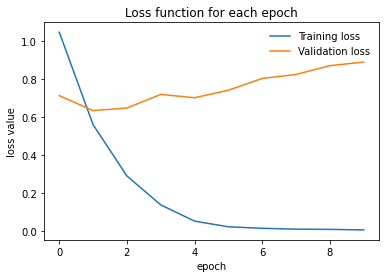

In [ ]:
plt.plot(train_loss, label='Training loss')
plt.plot(valid_loss, label='Validation loss')
plt.legend(frameon=False)
plt.xlabel('epoch')
plt.ylabel('loss value')
plt.title("Loss function for each epoch") 
plt.show()

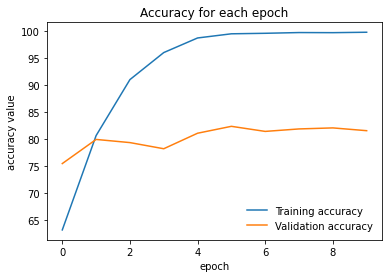

In [ ]:
plt.plot(train_acc, label='Training accuracy')
plt.plot(valid_acc, label='Validation accuracy')
plt.legend(frameon=False)
plt.xlabel('epoch')
plt.ylabel('accuracy value')
plt.title("Accuracy for each epoch")
plt.show()

In [ ]:
government =  TEXT.vocab.stoi['کشور']
iran = TEXT.vocab.stoi['ایران']
pen = TEXT.vocab.stoi['خودکار']

government_embed = net.embedding(torch.tensor(government))
iran_embed = net.embedding(torch.tensor(iran))
pen_embed = net.embedding(torch.tensor(pen))

In [ ]:
print(torch.dot(government_embed, iran_embed))
print(torch.dot(pen_embed, iran_embed))
print(torch.dot(government_embed, pen_embed))

tensor(-7.2667, grad_fn=<DotBackward>)
tensor(-2.1352, grad_fn=<DotBackward>)
tensor(-6.6804, grad_fn=<DotBackward>)


In [ ]:
print(government_embed)

tensor([-3.0233e-01, -4.3818e-01,  6.0325e-01, -5.9731e-02, -9.0033e-02,
         3.9408e-01, -3.8855e-01, -9.1681e-01, -8.8166e-02, -5.5556e-01,
        -2.1136e+00,  1.3699e-01,  5.6866e-01,  6.4756e-01,  2.5823e-03,
         7.0589e-01,  4.1462e-01,  7.6834e-01,  1.3449e+00,  1.2755e-01,
         5.7956e-02, -3.5100e-02, -1.9937e-01, -7.7414e-01, -1.1290e-01,
        -9.6691e-01,  3.5414e-01, -9.7136e-01, -2.1093e-01,  7.1831e-01,
        -1.4555e-01,  5.4099e-01,  5.8140e-01,  1.7749e+00,  2.3443e+00,
         1.5435e+00, -2.2051e+00,  5.0571e-01,  8.5601e-01, -7.2190e-01,
        -6.2321e-01, -5.0002e-03, -4.8960e-01, -8.2635e-01, -5.9618e-01,
        -1.6780e+00,  6.5522e-01,  3.1886e-02,  1.7318e-01, -2.0541e-01,
         4.2126e-01, -2.6807e-01,  1.4962e+00,  1.7129e+00,  2.4091e-01,
         1.2936e+00, -1.4903e+00,  3.2646e-01, -1.2222e-01, -3.2865e-02,
         4.9689e-01,  7.8191e-02,  6.0791e-01,  1.0400e+00,  4.2496e-01,
         9.0510e-01,  7.6028e-01, -9.2301e-01,  1.4

In [ ]:
!pip install gensim
!pip install --upgrade gensim --user

     |████████████████████████████████| 24.0 MB 78 kB/s 


In [ ]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from parsivar import Normalizer, Tokenizer, FindStems, POSTagger, FindChunks
import pandas as pd

TRAIN_PATH = "/content/drive/MyDrive/Mohaymen/Phase05/hamshahri/train.csv"
VALID_PATH = "/content/drive/MyDrive/Mohaymen/Phase05/hamshahri/valid.csv"

train = pd.read_csv(TRAIN_PATH)
valid = pd.read_csv(VALID_PATH)

tokenizer = Tokenizer()
sentences = [tokenizer.tokenize_words(row) for row in train.preprocessing]
sentences += [tokenizer.tokenize_words(row) for row in valid.preprocessing]


In [ ]:
model_embed = Word2Vec(min_count=3, size=128)
model_embed.build_vocab(sentences)


In [ ]:
model_embed.wv.most_similar('دولت')

[('ژاندارک', 0.35136061906814575),
 ('تایید', 0.3442356586456299),
 ('غربی', 0.3401731848716736),
 ('کسبه', 0.3263830244541168),
 ('تکاملی', 0.3176482319831848),
 ('مشاعی', 0.3151734471321106),
 ('لورکوزن', 0.3030241131782532),
 ('لاجوردی', 0.3027006983757019),
 ('تصویب', 0.3010038137435913),
 ('پدرام', 0.292545348405838)]

In [ ]:
model_embed.wv.similarity('کشور', 'ایران')

0.037809413

In [ ]:
model_embed.wv.similarity('دانشگاه', 'ایران')

0.08449181

In [ ]:
print(list(model_embed.wv.vocab))

['هشتمین', 'نمایشگاه', 'بین\u200cالمللی', 'عکس', 'تهران', 'سخن', 'سیدعطائالله', 'مهاجرانی', 'وزیر', 'فرهنگ', 'ارشاداسلامی', 'عصر', 'موزه', 'هنر', 'معاصر', 'گشایش', 'منتقد', 'پیشنهاد', 'ونحوه', 'داوری', 'بعدی', 'برگزار', 'نفرات', 'سه', 'مستند', 'اجتماعی', 'ابداعی', 'وآزاد', 'ترتیب', 'عبارتند', 'آنت', 'لیتوانی', 'گزارش', 'عکاس', 'کشورجهان', 'جمله', 'آرژانتین', 'آلمان', 'اتریش', 'آمریکا', 'اسپانیا', 'انگلستان', 'ایتالیا', 'چین', 'ژاپن', 'حضور', 'نگارخانه', 'شیو', 'دومین', 'اثر', 'نقاشی', 'کودک', 'ونوجوانان', 'شهریور', 'ساعت', 'خیابان', 'مطهری', 'جم', 'پلاک', 'تلفن', 'لاله', 'ایران', 'جهانشاهی', 'انبوهی', 'فاطمی', 'جنب', 'هتل', 'گالری', 'سیحون', 'طراحی', 'کوروش', 'وفرهاد', 'کوچه', 'چهارم', 'شماره', 'سبز', 'سعید', 'بهنود', 'روبه', 'پارک', 'ساعی', 'حسینی', 'مهسا', 'شعله', 'آفریقا', 'بلوار', 'بامداد', 'مریم', 'شریف', 'فوزیه', 'گرجی', 'ماگنولیا', 'قیمت', 'فروش', 'سکه', 'طلانوع', 'قیمتریالسکه', 'بهارآزادیطرح', 'جدیدسکه', 'قدیمسکه', 'نیم', 'بهار', 'آزادی', 'ربع', 'گرم', 'طلا', 'عیاریک', 'مثقال',

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65010 missing from current font.
  font.set_text(s, 0, flags=flags)


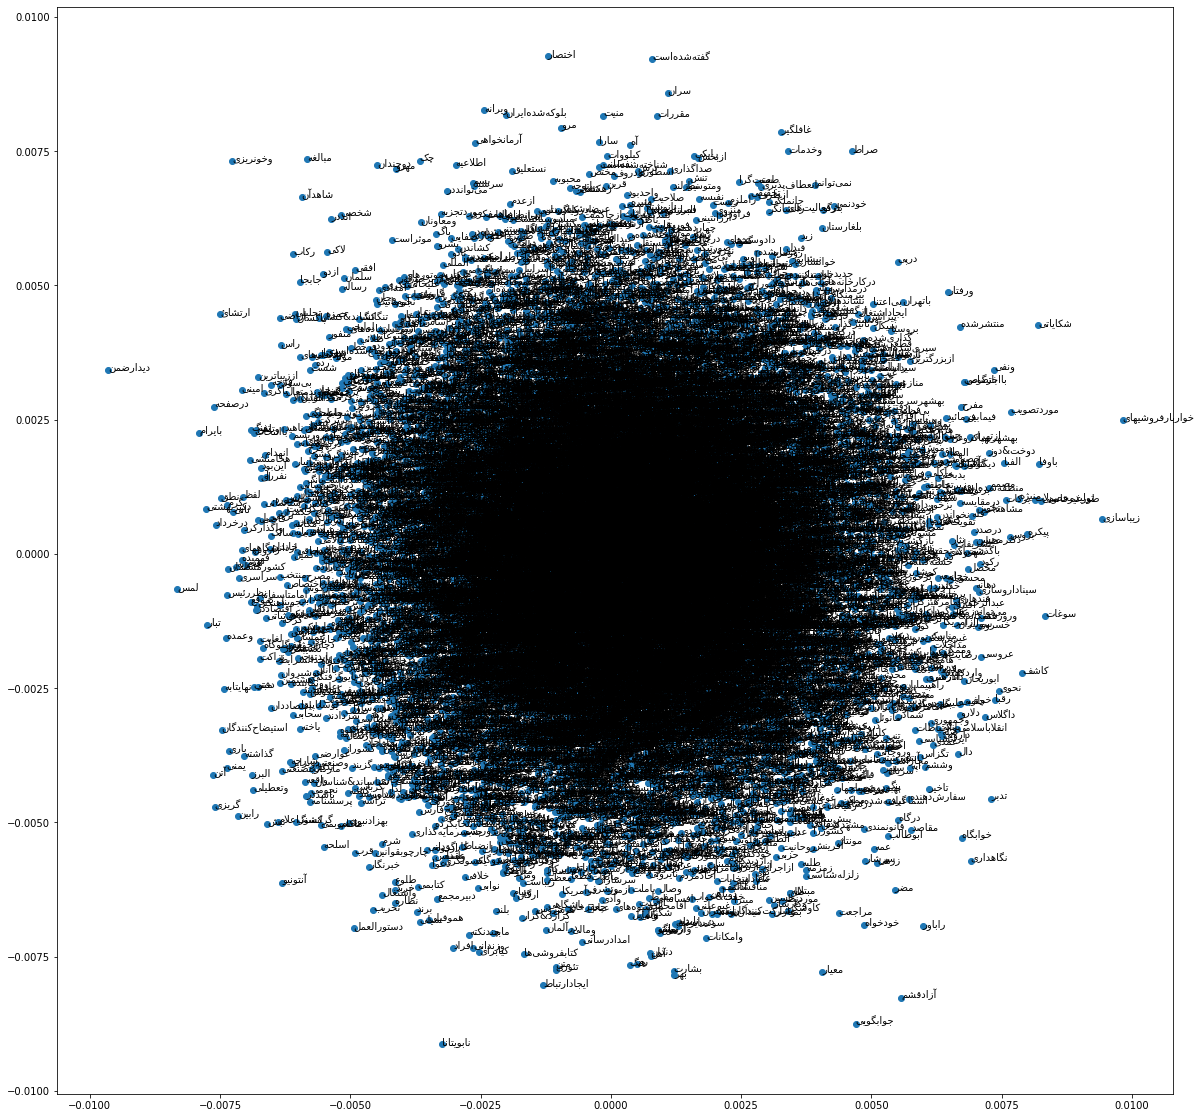

In [ ]:
from sklearn.decomposition import PCA
from bidi.algorithm import get_display
from arabic_reshaper import reshape
import matplotlib.pyplot as plt


vectors = model_embed.wv[model_embed.wv.vocab]

pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

plt.figure(figsize=(20, 20))
plt.scatter(x=result[:, 0], y=result[:, 1])

words = list(model_embed.wv.index2word)

for i, word in enumerate(words):
  plt.annotate(get_display(reshape(word)), size=10, xy=(result[i, 0], result[i, 1]))

In [ ]:
vocab_size = len(TEXT.vocab)
embedding_dim = 128 
num_hidden_nodes = 32
num_output_nodes = 6
num_layers = 2
dropout = 0.3

net_embed = LSTM(vocab_size, embedding_dim, num_hidden_nodes, num_output_nodes, num_layers, dropout=dropout)

In [ ]:
num_epoch = 10
learning_rate= 0.001

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net_embed.parameters(), lr = learning_rate)
scheduler = lr_scheduler.StepLR(optimizer, 2, gamma=0.7)


n_total_step = len(train_loader)

In [ ]:
import torchtext.vocab as vocab
from tqdm import tqdm_notebook

word2vec_vectors = []

for token, idx in tqdm_notebook(TEXT.vocab.stoi.items()):
    if token in model_embed.wv.vocab.keys():
        word2vec_vectors.append(torch.FloatTensor(model_embed[token]))
    else:
        word2vec_vectors.append(torch.zeros(128))

TEXT.vocab.set_vectors(TEXT.vocab.stoi, word2vec_vectors, 128)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/72908 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  


In [ ]:
len(TEXT.vocab)

18327

In [ ]:
pre_trained_emb = torch.FloatTensor(TEXT.vocab.vectors)
embedding = nn.Embedding.from_pretrained(pre_trained_emb)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net_embed = net_embed.to(device)
criterion = criterion.to(device)

In [ ]:
from tqdm import tqdm

train_loss, valid_loss = [], []
train_acc, valid_acc = [], []

for epoch in range(num_epoch):

  train_loss, train_acc = train_fun(net_embed, train_loader)
  valid_loss, valid_acc = evaluate(net_embed, valid_loader)   

  scheduler.step()

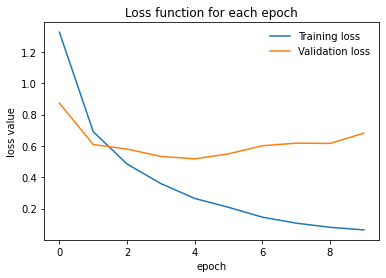

In [ ]:
plt.plot(train_loss, label='Training loss')
plt.plot(valid_loss, label='Validation loss')
plt.legend(frameon=False)
plt.xlabel('epoch')
plt.ylabel('loss value')
plt.title("Loss function for each epoch") 
plt.show()

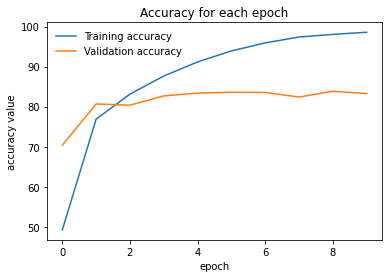

In [ ]:
plt.plot(train_acc, label='Training accuracy')
plt.plot(valid_acc, label='Validation accuracy')
plt.legend(frameon=False)
plt.xlabel('epoch')
plt.ylabel('accuracy value')
plt.title("Accuracy for each epoch")
plt.show()

In [ ]:
y_pred_test, y_actual_test = test(net_embed, test_loader)

accuracy of network on the 196 texts is : 81.1742172241211
Accuracy of ﯽﺳﺎﯿﺳ: 92.85714285714286 %
Accuracy of ﺩﺎﺼﺘﻗﺍ: 81.08108108108108 %
Accuracy of ﺵﺯﺭﻭ: 94.19795221843003 %
Accuracy of ﯽﻋﺎﻤﺘﺟﺍ: 70.9251101321586 %
Accuracy of ﯽﮕﻨﻫﺮﻓ ﯽﻤﻠﻋ: 27.722772277227723 %
Accuracy of ﺮﻨﻫ ﻭ ﺏﺩﺍ: 55.55555555555556 %


In [ ]:
from bidi.algorithm import get_display
from arabic_reshaper import reshape
from sklearn import metrics
import seaborn as sns

def confusion_matrix(y_actual_test, y_pred_test):
  
  plt.figure(figsize = (10,7))
  ax= plt.subplot()
  cnf_matrix = metrics.confusion_matrix(y_actual_test, y_pred_test)
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g', ax=ax)
  ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
  ax.set_title('Confusion Matrix of net_embed'); 
  class_names= classes
  class_names = [get_display(reshape(label)) for label in class_names]
  ax.xaxis.set_ticklabels(class_names); ax.yaxis.set_ticklabels(class_names);
  plt.tight_layout()

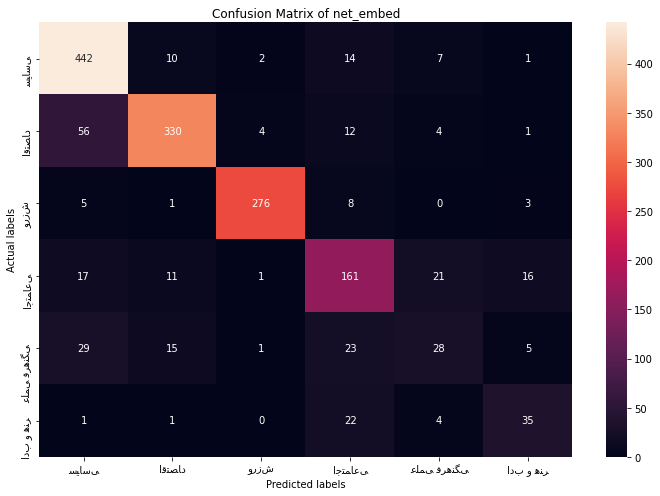

In [ ]:
confusion_matrix(y_actual_test, y_pred_test)